In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import poisson
from hmmlearn import hmm

C:\Users\johnw\AppData\Local\Temp\ipykernel_16284\3364708012.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


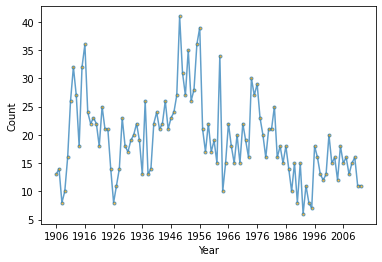

In [2]:
# earthquake data from http://earthquake.usgs.gov/
earthquakes = np.array([
    13, 14, 8, 10, 16, 26, 32, 27, 18, 32, 36, 24, 22, 23, 22, 18,
    25, 21, 21, 14, 8, 11, 14, 23, 18, 17, 19, 20, 22, 19, 13, 26,
    13, 14, 22, 24, 21, 22, 26, 21, 23, 24, 27, 41, 31, 27, 35, 26,
    28, 36, 39, 21, 17, 22, 17, 19, 15, 34, 10, 15, 22, 18, 15, 20,
    15, 22, 19, 16, 30, 27, 29, 23, 20, 16, 21, 21, 25, 16, 18, 15,
    18, 14, 10, 15, 8, 15, 6, 11, 8, 7, 18, 16, 13, 12, 13, 20,
    15, 16, 12, 18, 15, 16, 13, 15, 16, 11, 11])


# Plot the sampled data
fig, ax = plt.subplots()
ax.plot(earthquakes, ".-", ms=6, mfc="orange", alpha=0.7)
ax.set_xticks(range(0, earthquakes.size, 10))
ax.set_xticklabels(range(1906, 2007, 10))
ax.set_xlabel('Year')
ax.set_ylabel('Count')
fig.show();

In [3]:
# Now, fit a Gaussian Hidden Markov Model to the data.

scores = list()
models = list()
for n_components in range(1, 5):
    for idx in range(10):  # ten different random starting states
        # define our hidden Markov model
        model = hmm.GaussianHMM(n_components=n_components, random_state=idx,
                               n_iter=10)
        model.fit(earthquakes[:, None])
        models.append(model)
        scores.append(model.score(earthquakes[:, None]))
        print(f'Converged: {model.monitor_.converged}\t\t'
              f'Score: {scores[-1]}')

C:\Users\johnw\miniconda3\envs\575\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\johnw\miniconda3\envs\575\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\johnw\miniconda3\envs\575\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\johnw\miniconda3\envs\575\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans 

Converged: True		Score: -362.2749403285327
Converged: True		Score: -362.2749403285327
Converged: True		Score: -362.2749403285327
Converged: True		Score: -362.2749403285327
Converged: True		Score: -362.2749403285327
Converged: True		Score: -362.2749403285327
Converged: True		Score: -362.2749403285327


C:\Users\johnw\miniconda3\envs\575\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\johnw\miniconda3\envs\575\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\johnw\miniconda3\envs\575\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Converged: True		Score: -362.2749403285327
Converged: True		Score: -362.2749403285327
Converged: True		Score: -362.2749403285327
Converged: True		Score: -340.6209981305562
Converged: True		Score: -340.6209981305562
Converged: True		Score: -340.6209981305562
Converged: True		Score: -340.6209981305562
Converged: True		Score: -340.6209981305562
Converged: True		Score: -340.6209981305562
Converged: True		Score: -340.6209981305562
Converged: True		Score: -340.6209981305562
Converged: True		Score: -340.62056590859527
Converged: True		Score: -340.62056590859527
Converged: True		Score: -327.7919999119464
Converged: True		Score: -327.7919999119462
Converged: True		Score: -327.7919999119464
Converged: True		Score: -327.78362778667224
Converged: True		Score: -327.7919999119462
Converged: True		Score: -327.78362778667224
Converged: True		Score: -327.7836277866728
Converged: True		Score: -327.7919999119464
Converged: True		Score: -327.7919999119464
Converged: True		Score: -327.8085567983406
Converg

In [4]:
# get the best model
model = models[np.argmax(scores)]
print(f'The best model had a score of {max(scores)} and '
      f'{model.n_components} components')

The best model had a score of -326.46802564863344 and 4 components


In [5]:
# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
states = model.predict(earthquakes[:, None])

In [6]:
states

array([0, 0, 0, 0, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 0,
       3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 1, 0, 3, 2, 2, 2, 2, 2, 2,
       2, 3, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [7]:
model.means_[states]

array([[12.52835803],
       [12.52835803],
       [12.52835803],
       [12.52835803],
       [16.72560706],
       [29.97524758],
       [29.97524758],
       [29.97524758],
       [29.97524758],
       [29.97524758],
       [29.97524758],
       [20.80007946],
       [20.80007946],
       [20.80007946],
       [20.80007946],
       [20.80007946],
       [20.80007946],
       [20.80007946],
       [20.80007946],
       [16.72560706],
       [12.52835803],
       [12.52835803],
       [16.72560706],
       [20.80007946],
       [20.80007946],
       [20.80007946],
       [20.80007946],
       [20.80007946],
       [20.80007946],
       [20.80007946],
       [16.72560706],
       [20.80007946],
       [16.72560706],
       [16.72560706],
       [20.80007946],
       [20.80007946],
       [20.80007946],
       [20.80007946],
       [20.80007946],
       [20.80007946],
       [20.80007946],
       [20.80007946],
       [29.97524758],
       [29.97524758],
       [29.97524758],
       [29

Text(0.5, 0, 'State')

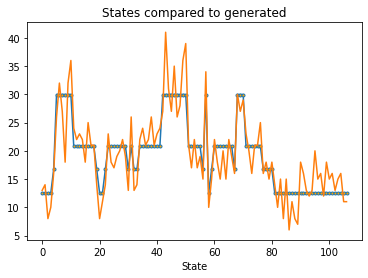

In [8]:
# Let's plot the waiting times from our most likely series of states of
# earthquake activity with the earthquake data. As we can see, the
# model with the maximum likelihood had different states which may reflect
# times of varying earthquake danger.

# plot model states over time
fig, ax = plt.subplots()
ax.plot(model.means_[states], ".-", ms=6, mfc="orange")
ax.plot(earthquakes)
ax.set_title('States compared to generated')
ax.set_xlabel('State')

Text(0, 0.5, 'State From')

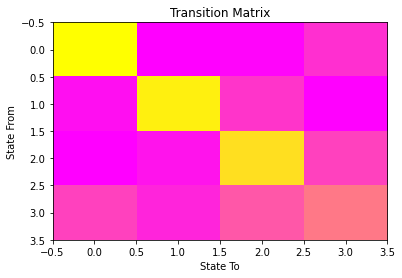

In [9]:
# Fortunately, 2006 ended with a period of relative tectonic stability, and,
# if we look at our transition matrix, we can see that the off-diagonal terms
# are small, meaning that the state transitions are rare and it's unlikely that
# there will be high earthquake danger in the near future.

fig, ax = plt.subplots()
ax.imshow(model.transmat_, aspect='auto', cmap='spring')
ax.set_title('Transition Matrix')
ax.set_xlabel('State To')
ax.set_ylabel('State From')

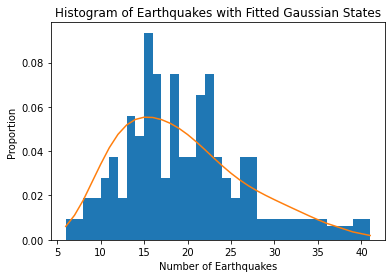

In [10]:
# Finally, let's look at the distribution of earthquakes compared to our
# waiting time parameter values. We can see that our model fits the
# distribution fairly well, replicating results from the reference.

# get probabilities for each state given the data, take the average
# to find the proportion of time in that state
prop_per_state = model.predict_proba(earthquakes[:, None]).mean(axis=0)

# earthquake counts to plot
bins = sorted(np.unique(earthquakes))

fig, ax = plt.subplots()
ax.hist(earthquakes, bins=bins, density=True)
ax.plot(bins, np.dot(poisson.pmf(bins, model.means_).T,
                     prop_per_state[:, None]))
ax.set_title('Histogram of Earthquakes with Fitted Gaussian States')
ax.set_xlabel('Number of Earthquakes')
ax.set_ylabel('Proportion')

plt.show();